# CE-40957: Reinforcement Learning
## HW1

*Full name:* Sayeh Jarollahi

*Student number:* 98101339

In this notebook, you will learn about reinforcement learning and its implementation in OpenAI Gym environments. 


This notebook is intended to provide hands-on experience with implementing reinforcement learning algorithms and evaluating their performance. By working through the code and examples, you will gain a deeper understanding of how Q-learning and monte carlo method works and how it can be applied to real-world problems.

# 1. Q-learning

In [ ]:
!pip install gym[toy_text]
import gym
import numpy as np
import random
from tqdm import trange 
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ["SDL_VIDEODRIVER"] = "dummy"
clear_output()

! pip install imagemagick
from matplotlib import animation
import matplotlib.pyplot as plt
import gym 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement imagemagick (from versions: none)
ERROR: No matching distribution found for imagemagick


## Gym OpenAI Environments
`gym` is a library developed by OpenAI that provides a suite of environments for developing and comparing reinforcement learning algorithms. Each environment has a well-defined observation space and action space, as well as a reset function that returns the environment to its initial state.

The main steps involved in training an agent in a `gym` environment are:

1. Initialize the environment
2. Reset the environment to its initial state
3. Take an action in the current state
4. Observe the new state and reward
5. Update the agent's policy based on the observed reward and new state
6. Repeat steps 3 to 5 until the environment returns a "done" signal

Once the agent has learned a good policy, it can be evaluated by running it in the environment for several episodes and measuring its average reward.

### FrozenLake environment
The `FrozenLake-v1` environment is a variant of the classic reinforcement learning problem where the agent must navigate a grid while avoiding obstacles. 

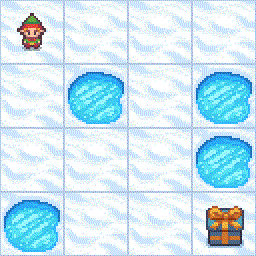


* **Observation Space:** The observation space of the environment is a grid representing the state of the lake.
* **Action Space:** The agent has four possible actions at each time step: move up, move down, move left, or move right.
* **Goal:** The goal of the agent is to reach the goal state while avoiding holes in the ice.
* **Reward:** Reach goal(G): +1 , Reach hole(H): 0 , Reach frozen(F): 0
* **Episode Termination:** The environment signals the end of an episode with a "done" signal.


In [ ]:
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4")
spec = gym.spec('FrozenLake-v1')

print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")

Action Space: Discrete(4)
Observation Space: Discrete(16)
Max Episode Steps: 100
Nondeterministic: False
Reward Range: (0, 1)
Reward Threshold: 0.7



/usr/local/lib/python3.8/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.8/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [ ]:
Actions =  {0: 'LEFT', 
            1: 'DOWN',
            2: 'RIGHT',
            3: 'UP'}

LEFT --> LEFT --> RIGHT


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


(-0.5, 255.5, 255.5, -0.5)

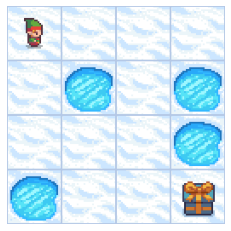

In [ ]:
# Be free to test!
# take random actions, and see how the agent moves

env.reset()

action_seq= []

for i in range(3):
  action_number = env.action_space.sample()
  action_seq.append(Actions[action_number])
  env.step(action_number)

print(' --> '.join(action_seq))
env_screen = env.render(mode = 'rgb_array')
plt.imshow(env_screen)
plt.axis('off')

## Q-Learning
Q-Learning is a model-free reinforcement learning algorithm that is used to find the optimal policy for an agent in an environment. It is based on the idea of updating an estimate of the optimal action-value function using the Bellman equation. The optimal action-value function is defined as the maximum expected reward that an agent can receive by taking an action a in a state s and following the optimal policy thereafter.

The action-value function Q(s,a) is updated iteratively as follows:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

where ‍‍‍‍‍`r` is the reward received after taking action a in state `s`, `s'` is the new state, $\gamma$ is the discount factor (a value between 0 and 1 that determines the importance of future rewards), and $\alpha$ is the learning rate (determines the step size at which the value function is updated).

In [ ]:
def q_learning(env, num_episodes, alpha, gamma, max_epsilon=1):
    # Initialize the action-value function Q(s,a)
    min_epsilon = 0.01
    decay_rate = 0.001
    epsilon = max_epsilon
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    all_rewards = []
    episodes_length = []
    # Loop over each episode
    for episode in range(num_episodes):
        # ==================================== Your Code (Begin) ====================================
        state = env.reset()
        total_reward = 0 
        done = False
        step_count = 0 
        while not done:
            step_count += 1
            if random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(Q[state, :])
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            Q[state, action] = (1-alpha)*Q[state, action]+alpha*(reward+gamma*np.max(Q[next_state, :])) 
            state = next_state  
            if done: 
                episodes_length.append(step_count)
                all_rewards.append(total_reward)
                if epsilon>min_epsilon:
                    epsilon *= (1-decay_rate)
        # ==================================== Your Code (End) ====================================
    return Q, all_rewards, episodes_length

In [ ]:
# change the parameters if needed
num_episodes = 10000
alpha = 0.2
gamma = 0.95

Q, all_rewards_q, episodes_length_q = q_learning(env, num_episodes, alpha, gamma, max_epsilon=0.7)


In [ ]:
# code is taken from https://gist.github.com/botforge/64cbb71780e6208172bbf03cd9293553

def save_frames_as_gif(frames, path='./', filename='gym_animation.gif'):

    #Mess with this to change frame size
    plt.figure(figsize=(frames[0].shape[1] / 72.0, frames[0].shape[0] / 72.0), dpi=72)

    patch = plt.imshow(frames[0])
    plt.axis('off')

    def animate(i):
        patch.set_data(frames[i])

    anim = animation.FuncAnimation(plt.gcf(), animate, frames = len(frames), interval=50)
    anim.save(path + filename, writer='imagemagick', fps=60)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement imagemagick (from versions: none)
ERROR: No matching distribution found for imagemagick


/usr/local/lib/python3.8/dist-packages/gym/core.py:43: DeprecationWarning: WARN: The argument mode in render method is deprecated; use render_mode during environment initialization instead.
See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(


Successful episode!


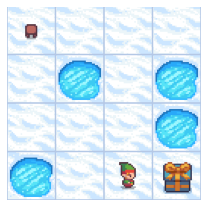

In [ ]:

state = env.reset()
done = False
actions = []
states = []
frames = []

while not done:
    frames.append(env.render(mode="rgb_array"))
    action = np.argmax(Q[state, :])
    actions.append(action)
    new_state, reward, done, _ = env.step(action)
    states.append(state)
    state = new_state
    if done:
        if reward == 1:
            print("Successful episode!")
        else:
            print(reward)
            print("Failed episode")
save_frames_as_gif(frames)

In [ ]:
# Print sequence of actions that has taken to reach the goal
# Any visualization for further intuition would be appreciated.
print('Actions:','->'.join([Actions[i] for i in actions]))
print('States:', '->'.join([str(i) for i in states]))

Actions: RIGHT->LEFT->UP->DOWN->RIGHT->DOWN->DOWN->DOWN->DOWN->RIGHT->DOWN
States: 0->4->8->9->13->14->14->14->14->13->14


#### Animated GIF for the output

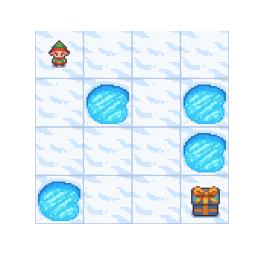

## SARSA
SARSA (State-Action-Reward-State-Action) is a popular reinforcement learning algorithm used for finding an optimal policy in an environment. Like Q-learning, SARSA is an off-policy algorithm that updates the values of the Q-table based on the observed rewards and next state-action pairs.

The key difference between SARSA and Q-learning is in the selection of the next action. In SARSA, the next action is selected based on the current policy, whereas in Q-learning, the next action is selected based on the greedy policy. This means that in SARSA, the algorithm is learning about the expected returns from the current policy, whereas in Q-learning, the algorithm is learning about the optimal policy.

Mathematically, the SARSA update rule can be represented as:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$


Where $Q(S_t,A_t)$ is the current estimate of the expected return for taking action $A_t$ in state $S_t$, $\alpha$ is the learning rate, $R_{t+1}$ is the reward received after taking action $A_t$ in state $S_t$, $\gamma$ is the discount factor, and $Q(S_{t+1},A_{t+1})$ is the estimated return for taking action $A_{t+1}$ in the next state $S_{t+1}$.


In [ ]:
def sarsa(env, num_episodes, alpha, gamma, epsilon):
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    max_epsilon = 1.0
    min_epsilon = 0.01
    decay_rate = 0.001
    # epsilon = max_epsilon
    all_rewards = []
    episodes_length = []

    for episode in range(num_episodes):
        state = env.reset()
        steps = 0
        # ==================================== Your Code (Begin) ====================================
        total_reward = 0 
        done = False
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(Q[state, :])
        while not done:
            steps += 1
            next_state, reward, done, _ = env.step(action)
            total_reward += reward
            next_action = env.action_space.sample() if random.uniform(0, 1)< epsilon else np.argmax(Q[next_state, :])
            Q[state, action] = (1-alpha)*Q[state, action]+alpha*(reward+gamma*Q[next_state, next_action]) 
            state = next_state  
            action = next_action 
            if done: 
                all_rewards.append(total_reward)
                episodes_length.append(steps)
                if epsilon>min_epsilon:
                    epsilon *= (1-decay_rate)
        # ==================================== Your Code (End) ====================================
        
    return Q, all_rewards, episodes_length

In [ ]:
# change the parameters if needed
n_episodes = 10000
alpha = 0.1
gamma = 0.9
epsilon = 0.4

In [ ]:
Q_sarsa, all_rewards_sarsa, episodes_length_sarsa = sarsa(env, n_episodes, alpha, gamma, epsilon)

In [ ]:
frames, actions, states= [], [], []
state = env.reset()
done = False
while not done:
    frames.append(env.render(mode="rgb_array"))
    action = np.argmax(Q_sarsa[state, :])
    actions.append(action)
    states.append(state)
    new_state, reward, done, _ = env.step(action)
    state = new_state
    if done:
        if reward == 1:
            print("Successful episode!")
        else:
            print("Failed episode")

Successful episode!


Actions: RIGHT->UP->LEFT->UP->RIGHT->RIGHT->LEFT->RIGHT->LEFT->RIGHT->RIGHT->UP->LEFT->LEFT->LEFT->DOWN->DOWN
States: 0->1->2->1->0->0->4->0->4->0->0->1->2->6->10->14->14
Number of steps 17


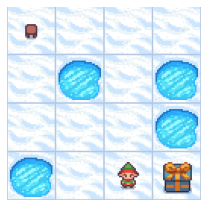

In [ ]:
# Print sequence of actions that has taken to reach the goal
# Any visualization for further intuition would be appreciated.
print('Actions:','->'.join([Actions[i] for i in actions]))
print('States:', '->'.join([str(i) for i in states]))
print('Number of steps', len(actions))
save_frames_as_gif(frames)

#### Visualization:
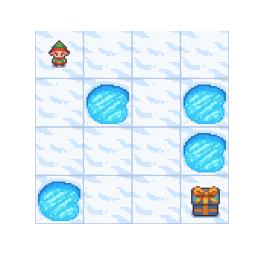

## Conclusion
Compare these 2 methods based on average return, penalty, episode length and success rate.
In the previous cells, if necessary, store the necessary variables for this comparison and use them in the following block.

In [ ]:
print(f'Average episode length ==> q-learning: {sum(episodes_length_q)/len(episodes_length_q)}, SARSA: {sum(episodes_length_sarsa)/len(episodes_length_sarsa)}')
print('='*60)
print(f'Number of wins ==> q-learning: {sum(all_rewards_q)}  SARSA: {sum(all_rewards_sarsa)}')
print('='*60)
print(f'Average Rewards ==> q-learning: {sum(all_rewards_q)/len(all_rewards_q)}  SARSA: {sum(all_rewards_sarsa)/len(all_rewards_q)}')
print('='*60)
print(f'Penalty ==> q-learning: {min(all_rewards_q)}  SARSA: {min(all_rewards_q)}')
print('='*60)
print(f'Success Rate ==> q-learning: {sum(all_rewards_q)/len(all_rewards_q)}  SARSA: {sum(all_rewards_sarsa)/len(all_rewards_sarsa)}')


Average episode length ==> q-learning: 29.5389, SARSA: 27.9388
Number of wins ==> q-learning: 4342.0  SARSA: 4219.0
Average Rewards ==> q-learning: 0.4342  SARSA: 0.4219
Penalty ==> q-learning: 0.0  SARSA: 0.0
Success Rate ==> q-learning: 0.4342  SARSA: 0.4219


<br><br><br><br><br><br><br><br><br><br><br><br>
As we know, SARSA is sub-optimal but q-learning reaches the optimal policy. Consequently, q-learning performs better than SARSA. The number of wins are higher in q-learning. Additionally, the average reward and success rate is higher in q-learning. In both algorithms, there is no negative penalty for losses and when the agent fails, it simply doesnt get any reward. 
<br>
There are 10,000 episodes for each algorithm, so we can say there are 5658 losses for Q-learning and there are 5781 losses for the SARSA algorithm. 
<br>
The success rate for Q-learning is 43.42% and this value for SARSA is 42.19%. 

# 2. Monte Carlo method

In this notebook, you will learn about the Monte Carlo method in the context of reinforcement learning.
Your agent will move in the following picture. This is a random walk with two possible actions (`LEFT` and `RIGHT`).
The agent gets a reward of 1 if it reaches the right-most state, and 0 otherwise. You are going to use such an environment with 31 states.

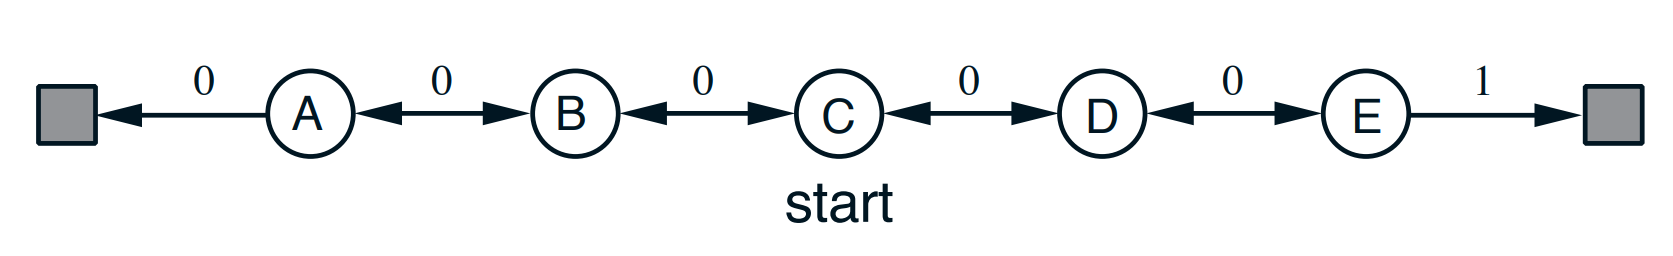

In [ ]:
class RandomWalkEnv():
    def __init__(self, num_states=31, start=15, gamma=1):
        self.num_states = num_states
        self.start = start
        self.end = num_states - 1
        self.gamma = gamma
        self.state = None
        self.actions = ['LEFT', 'RIGHT']

    def reset(self):
        self.state = self.start
        return self.state, 0, False

    def step(self, action):
        if self.state == self.end or self.state == 0:
            return self.state, 0, True
        action_direction = 0
        if action == 'RIGHT':
            action_direction = 1
        elif action == 'LEFT':
            action_direction = -1

        self.state += action_direction
        reward, done = 0, False
        if self.state == self.end:
            reward, done = 1, True
        elif self.state == 0:
            done = True
        return self.state, reward, done

    def get_true_values(self):
        values = [0] * self.num_states
  
        values[self.end - 1] = 1
        for i in range(self.end - 1, 1, -1):
            values[i - 1] = self.gamma * values[i]
        
        return values

The Monte Carlo method is a reinforcement learning technique for estimating the value function of a Markov decision process (MDP). It involves generating multiple episodes by following a given policy and computing the returns (sum of rewards) for each state-action pair. The value of a state-action pair is then estimated as the average of the returns obtained from that pair over multiple episodes.

The formula for updating the value function using the Monte Carlo method is:

\begin{equation}
Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \frac{1}{N(S_t,A_t)} \sum_{i=1}^{N(S_t,A_t)}(G_i - Q(S_t,A_t))
\end{equation}

where $Q(S_t,A_t)$ is the estimated value of the state-action pair $(S_t,A_t)$, $N(S_t,A_t)$ is the number of times the state-action pair has been visited, $G_i$ is the return obtained from the $i$th visit to the state-action pair, and the sum is taken over all $N(S_t,A_t)$ visits.

To implement the Monte Carlo method, you need to define the environment, the policy, and the number of episodes to simulate. At each step of the episode, you observe the state, take an action according to the policy, and observe the reward and the next state. You then update the value function using the formula above. As more episodes are generated, the value estimates become more accurate.

In [ ]:
from math import sqrt
actions = {'LEFT': 0, 'RIGHT':1}

def sample(env, Q, epsilon):
    total_reward = 0 
    state, reward, done = env.reset()
    episode = []
    while not done:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(env.actions)
        else:
            action = env.actions[np.argmax(Q[state, :])]
        next_state, reward, done = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        total_reward += reward
    return episode, total_reward



def MC(env, num_episodes, alpha=0.1):
    values, errors = [] ,  []
    gamma = 0.98
    min_epsilon = 0.001
    max_epsilon = 1
    decay = 0.99
    epsilon = max_epsilon
    # ==================================== Your Code (Begin) ====================================
    Q = np.zeros((env.num_states, len(env.actions)))
    N = np.zeros((env.num_states, len(env.actions)))
    for ep_num in range(num_episodes):
        episode, total_reward = sample(env, Q, epsilon)
        g= 0 
        for m  in reversed(episode):
            state, action, reward = m
            g = gamma * g + reward
            a = actions[action]
            N[state, a] += 1 
            Q[state, a] = Q[state, a] + alpha *(g - Q[state, a])
        if epsilon>min_epsilon:
            epsilon *= decay 
        value = np.max(Q, axis=1)
        error = sqrt(np.mean(np.array(value - env.get_true_values())**2))
        values.append(value)
        errors.append(error)
    # ==================================== Your Code (End) ====================================
    return Q, values, errors

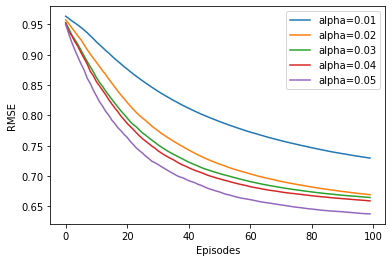

In [ ]:
# Visualization

import matplotlib.pyplot as plt
Qs = []
env = RandomWalkEnv()
num_episodes = 100
alphas = [0.01, 0.02, 0.03, 0.04, 0.05]
num_runs = 100

for alpha in alphas:
    rmse_avg = np.zeros(num_episodes)
    for run in range(num_runs):
        Q, values, errors = MC(env, num_episodes, alpha)
        Qs.append(Q)
        rmse_avg += np.array(errors)
    rmse_avg /= num_runs
    plt.plot(range(num_episodes), rmse_avg, label=f'alpha={alpha}')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('RMSE')
plt.show()

# Any visualization for better intuition would be appreciated.